In [7]:
!pip install asrtoolkit

     ---------------------------------------- 44.5/44.5 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 88.3/88.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 125.2/125.2 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 103.3/103.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for asrtoolkit: filename=asrtoolkit-0.2.4-py3-none-any.whl size=54666 sha256=32a810065fa89a99b6795918b7d0c074c3c9bf8be11b4ae613e02

In [9]:
!pip install fuzzywuzzy

In [3]:
pip install google-cloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install google-cloud-vision

     -------------------------------------- 444.0/444.0 kB 3.9 MB/s eta 0:00:00Note: you may need to restart the kernel to use updated packages.

     -------------------------------------- 120.5/120.5 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 48.1/48.1 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     -------------------------------------- 181.8/181.8 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.7 MB/s eta 0:00:00
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)


In [4]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install deskew

In [1]:
!pip install python-Levenshtein

     -------------------------------------- 101.0/101.0 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 4.2 MB/s eta 0:00:00


In [1]:
pip install google-cloud-storage

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade google-cloud-storage

Note: you may need to restart the kernel to use updated packages.


In [1]:
import asrtoolkit
from asrtoolkit import wer, cer
import cv2
import io
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np
from PIL import Image
import pytesseract
import sys
#skimage causing issues with io standard library, hence import as
from skimage import io as ioski
from skimage.color import rgb2gray
from skimage.transform import rotate, resize
import os
import re
from google.cloud import vision
#from google.cloud.vision_v1 import types
#from google.cloud.vision_v1.types import Image
from deskew import determine_skew
#from dotenv import load_dotenv, find_dotenv
#load_dotenv()
from google.cloud import storage

In [2]:
IMG_DIR = 'C:/Users/Gauri/3) PROJECTS/Image to Text/'

In [3]:
sample_img = IMG_DIR +'/sample_img.jpg'

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1294x737 at 0x2565A81B400>


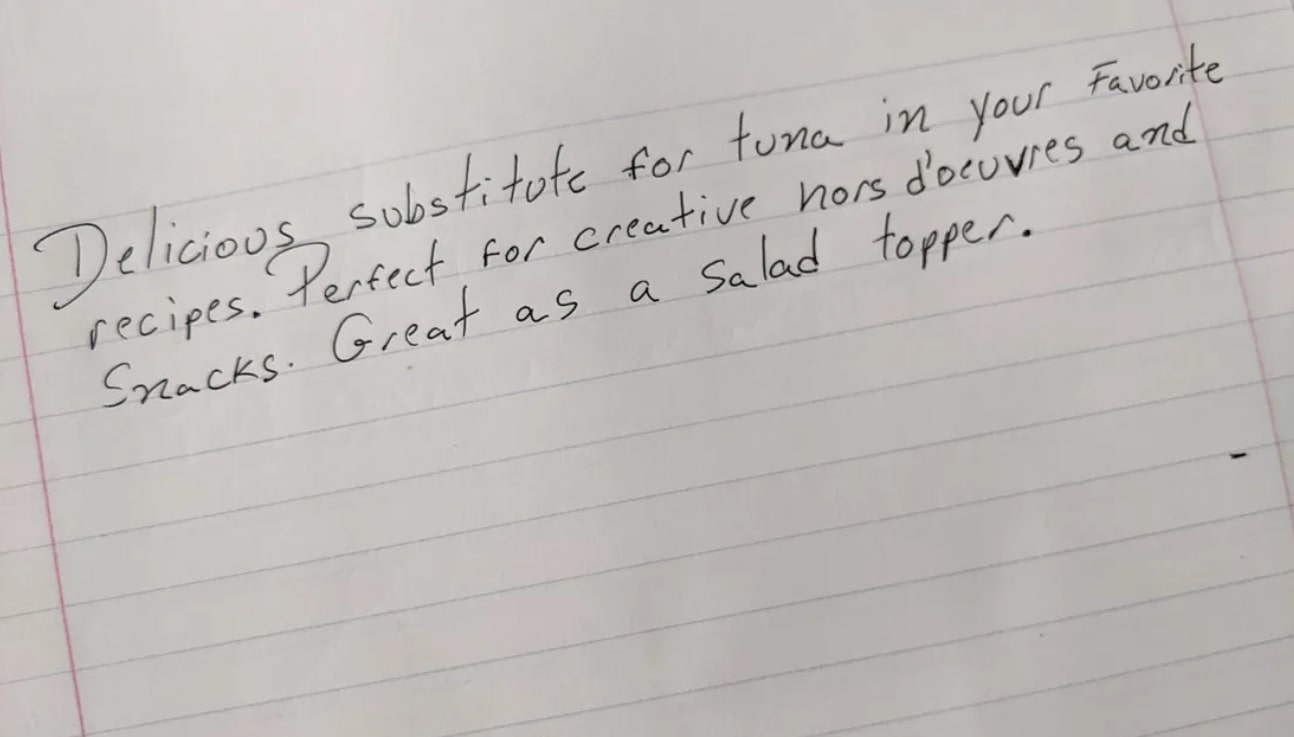

In [4]:
outputimage = Image.open(sample_img)
print(outputimage)
outputimage

In [5]:
image = ioski.imread(sample_img)
grayscale = rgb2gray(image)
angle = determine_skew(grayscale)
print(angle)
rotated = rotate(image, angle, resize=True) * 255
print(type(rotated))
ioski.imsave("output_deskewed.png", rotated.astype(np.uint8))

-9.99999999999999
<class 'numpy.ndarray'>


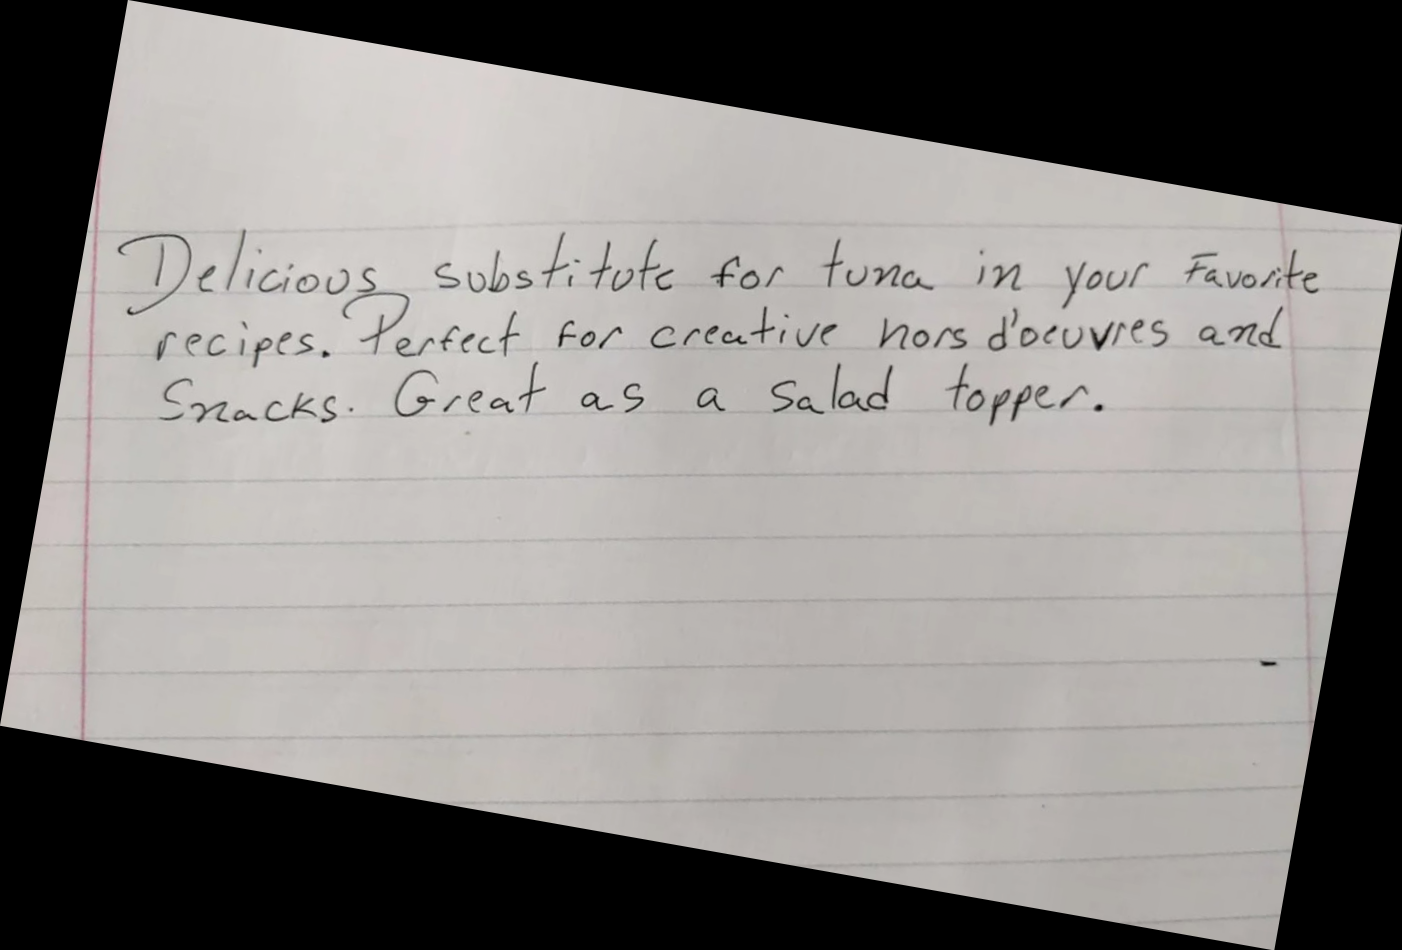

In [6]:
Image.open("output_deskewed.png")

In [7]:
def pre_process_image(image):
    """This function will pre-process a image with: cv2 & deskew
    so it can be process by tesseract"""
    img = cv2.imread(image)
    img = cv2.resize(img, None, fx=.3, fy=.3) #resize using percentage
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #change color format from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #format image to gray scale
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 11) #to remove background
    return img

In [8]:
def img_process(image):
    """This function will deskew"""
    cv2output = io.imread(image)
    angle = determine_skew(cv2output)
    print("angle rotation of image",angle)
    rotated = rotate(cv2output, angle, resize=True) * 255
    return rotated

In [9]:
#use function pre_process_image to output processed image to a saved file.
processed_img = pre_process_image("output_deskewed.png")
cv2.imwrite("output_processed.png",processed_img)
processed_img = pre_process_image(sample_img)
cv2.imwrite("output_no_deskewing.png",processed_img)

True

In [10]:
ground_truth = "Delicious substitute for tuna in your favorite recipes. Perfect for creative hors d'oeuvres and snacks. Great as a salad topper"

In [11]:
#pytesseract no preprocessing
hypothesis0 = pytesseract.image_to_string(sample_img)
print("CER, WER, Rate :",cer(ground_truth, hypothesis0),wer(ground_truth, hypothesis0),fuzz.ratio(ground_truth, hypothesis0))
print(hypothesis0)

CER, WER, Rate : 100.0 100.0 0



In [12]:
#pytesseract out of the box with deskew & rgb2gray
hypothesis1 = pytesseract.image_to_string("output_deskewed.png")
print("CER, WER, Rate :",cer(ground_truth, hypothesis1),wer(ground_truth, hypothesis1),fuzz.ratio(ground_truth, hypothesis1))
print(hypothesis1)

CER, WER, Rate : 51.58730158730159 85.71428571428571 47
fas } /
: SobsT dute fof TUMa IN
Va) Sheed fos creative hors d’o
lobect as Ze S lad or

 



In [13]:
#pytesseract out of the box with preprocessing (no deskewing)
hypothesis2 = pytesseract.image_to_string("output_no_deskewing.png")
print("CER, WER, Rate :",cer(ground_truth, hypothesis2),wer(ground_truth, hypothesis2),fuzz.ratio(ground_truth, hypothesis2))
print(hypothesis2)

CER, WER, Rate : 70.63492063492063 119.04761904761905 43
le] h A

eliciod, cb titole 77 Lone. ine Your Festte

Del i Ree A fol ae on 5 and,
ld feet

recapess
Sonnets

 



In [14]:
#pytesseract out of the box with preprocessing w/ deskewing
hypothesis3 = pytesseract.image_to_string("output_processed.png")
print("CER, WER, Rate :",cer(ground_truth, hypothesis3),wer(ground_truth, hypothesis3),fuzz.ratio(ground_truth, hypothesis3))
print(hypothesis3)

CER, WER, Rate : 38.888888888888886 80.95238095238095 62
| Delicous, subsite: ter tuna in your Ravate
cipes, Pasteck Fon aetive Irom dees actd
ee Coat ob. Salad. ype

 

 



In [15]:
#pytesseract with ssq.traineddata, preprocessing
hypothesis4 = pytesseract.image_to_string("output_processed.png", lang="ssq")
print("CER, WER, Rate :",cer(ground_truth, hypothesis4),wer(ground_truth, hypothesis4),fuzz.ratio(ground_truth, hypothesis4))
print(hypothesis4)

CER, WER, Rate : 50.79365079365079 76.19047619047619 54
IDlions, custitole for tuna in your fundte
eihen. fopinel Foroarriur . hors locpures aont.
e."Chieat ws5.a0. b.ryeo.

 

 



In [17]:
client = vision.ImageAnnotatorClient()

In [19]:
#pass the image with text(handwritten) to google vision output string
with io.open("output_processed.png",'rb') as image_file:
    content = image_file.read()

image_v = vision.Image(content=content)
response = client.document_text_detection(image=image_v)
docText = response.full_text_annotation.text
hypothesis5 = docText

print("CER, WER, Rate :",cer(ground_truth, hypothesis5),wer(ground_truth, hypothesis5),fuzz.ratio(ground_truth, hypothesis5))
print(hypothesis5)

CER, WER, Rate : 21.428571428571427 23.80952380952381 81
Delicious for tune in
-recipes. Perfect for creative hors d'ocuvres and...
Snacks. Great as... a. salad, topper.


In [20]:
#pass the image with text(handwritten) to google vision output string
with io.open("output_deskewed.png",'rb') as image_file:
    content = image_file.read()

image_v = vision.Image(content=content)
response = client.document_text_detection(image=image_v)
docText = response.full_text_annotation.text
hypothesis6 = docText
print("CER, WER, Rate :",cer(ground_truth, hypothesis6),wer(ground_truth, hypothesis6),fuzz.ratio(ground_truth, hypothesis6))
print(hypothesis6)

CER, WER, Rate : 0.7936507936507936 4.761904761904762 94
Delicious substitute for tune in your Favorite
recipes. Perfect for creative hors d'oeuvres and
Snacks. Great as
a Salad topper.
